Task 1. [4 points]: The repository in data.gov.uk provides a set of datasets gathered in
the United Kingdom from multiple organizations. For this task, we are providing two tables
from this link. you need to download the two datasets called accidents and casualties that
you can use to solve the assignment. The data in the provided tables have been collected at
the traffic department in the UK.

In [2]:
import pandas as pd
import numpy as np
import _sqlite3 as sql


Question 1 Analysis: The two tables can be merged using the Accident Index field. Write
Python code to merge the two tables and store the results in a new CSV file.

Analysis: In this step, the goal is to merge the accidents and casualties tables using the common field Accident_Index.
Merging these tables consolidates accident and casualty details into a single dataset, which facilitates a comprehensive analysis of accident incidents and their outcomes. The resulting merged data is saved to a CSV file for further analysis.

In [3]:
import pandas as pd
import numpy as np
import _sqlite3 as sql

#Question 1
accidentdf = pd.read_csv("accidents.csv")
casualtiesdf = pd.read_csv("casualties.csv")
casualtiesdf.rename(columns={'Acc_Index':'Accident_Index'},inplace=True)
mergeddf = pd.merge(accidentdf,casualtiesdf, on='Accident_Index')
mergeddf = mergeddf.to_csv('accidentsandcasualties.csv', index = False)

Question 2: In the table accidents, the Accident Severity variable needs to be recoded.
Write Python code to replace the values in this column as 1 = Minor (1 should
be converted to Minor), 2 = Medium, and 3 = Severe. 

Analysis: The Accident_Severity column is recoded to replace numerical values (1, 2, 3) with descriptive labels ('Minor', 'Medium', 'Severe'). This makes the data easier to interpret and aligns the severity scale with more meaningful terms, aiding readability in future analyses.

In [7]:
#Question 2

accidentdf['Accident_Severity'] = accidentdf['Accident_Severity'].replace({3:'Severe',2:'Medium',1:'Minor'})
accidentdf.to_csv('accidents.csv')

Question 3: In the table accidents, replace missing values in a set of attributes by -1.
Then, write Python code to detect these values and report the names of the columns
in each table that contain such values.

Analysis: Missing values in certain columns of the accidents table are replaced with -1. This step ensures that these missing values can be detected and handled uniformly in subsequent analyses. A list of columns containing missing values is generated, allowing for easy reference to attributes with incomplete data.


In [8]:
#Question 3
accidentdf = accidentdf.fillna(-1)
accidentdf.to_csv('accidents.csv')
columns_with_msvals= []

for column in accidentdf.columns:
    if -1 in accidentdf[column].values:
        columns_with_msvals.append(column)

print(columns_with_msvals)

['Location_Easting_OSGR ', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location']


Question 4: For all numerical variables in table accidents, write a Python function
to check if there are any clearly extreme values, or values that do not belong in that
column (outliers). If you find any, remove these records from the dataset.

Analysis: Outliers in numerical columns are identified based on values that deviate by more than three standard deviations from the mean. This threshold helps in isolating extreme values that may distort analyses. Detected outliers are removed from the dataset, ensuring that analyses are based on a consistent range of values. The cleaned data is saved to a CSV file.


In [15]:
#Question 4
for column in accidentdf.columns:
    if pd.api.types.is_numeric_dtype(accidentdf[column]):
        mean = accidentdf[column].mean()
        std = accidentdf[column].std()
        
        # Define a list to store outliers for reporting
        extvals = []

        # Identify values that are more than 3 standard deviations away from the mean
        for value in accidentdf[column]:
            if abs(value - mean) > 3 * std:
                extvals.append(value)
        
        # Filter out rows containing these outliers
        accidentdf = accidentdf[~accidentdf[column].isin(extvals)]
        
        # Print the outliers for this column
        print(f"{column}: {extvals}")

# Save the cleaned data to a new CSV file
accidentdf.to_csv('accidents.csv', index=False)

Location_Easting_OSGR : [468690.0, 468670.0, 468340.0, 452330.0, 468270.0, 468560.0, 468400.0, 468740.0, 468540.0, 468340.0, 468430.0, 452240.0, 452330.0, 468494.0, 468457.0, 468643.0, 468483.0, 468450.0, 452150.0, 468450.0, 468600.0, 468650.0, 468530.0, 468261.0, 452210.0, 468740.0, 468691.0, 468639.0, 468617.0]
Location_Northing_OSGR: [444450.0, 444451.0, 444440.0]
Longitude: [-0.963289, -0.964341, -0.963591, -0.964355, -0.961751, -1.201916, -0.961935, -0.963591, -1.202905, -0.96454, -0.963385, -1.201333, -1.203713, -0.963554, -1.202482]
Latitude: [53.892503, 53.893229, 53.892894]
Police_Force: []
Number_of_Vehicles: []
Number_of_Casualties: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

Question 5: Write Python code to create a new attribute (column) in table casualties,
called is minor, that checks whether a casualty was a minor or an adult. Being
an adult is defined as having an age of 18 or above. The column should only contain
the values ‘Yes’ and ‘No’. 

Analysis: A new column, is_minor (Yes or No), is created in the casualties table, which categorizes each casualty as a minor or an adult based on age (minors being under 18). This distinction can help in identifying accident trends involving different age groups, potentially informing targeted safety measures.

In [21]:
#Question 5
casualtiesdf['is_minor'] = 'Yes'

casualtiesdf.loc[casualtiesdf['Age_of_Casualty'] >= 18, 'is_minor'] = 'No'
casualtiesdf.loc[casualtiesdf['Age_of_Casualty'] < 18, 'is_minor'] = 'Yes'

casualtiesdf.to_csv('casualties.csv', index=False)

Question 6: From the joined table created in question 1, choose an attribute that is
numeric and has some missing values. Then, calculate the average of all the available
values in that column and fill the missing cells in the column with the average value.
For example, the Location Easting OSGR variable has 471 missing values. solve this
with the imputation of the average of the ’Location Easting OSGR’ of all records.

Analysis: In this step, missing values in the Location_Easting_OSGR column from the merged dataset are filled with the column's mean. This imputation method helps retain the distribution and integrity of the data while allowing analyses to proceed without gaps.

In [24]:
joinedtable = pd.read_csv('accidentsandcasualties.csv', low_memory=False)

joinedtable['Location_Easting_OSGR '] = joinedtable['Location_Easting_OSGR '].fillna(joinedtable['Location_Easting_OSGR '].mean())
joinedtable.to_csv('accidentsandcasualties.csv', index=False)

Task 2. [3 points]: For this task, use the Pima Indians Diabetes Database (diabetes.csv). This dataset is publicly available on kaggle.

Question 1: Remove the disguised values from the table. We need to remove the values that equal to 0 from columns BloodPressure, SkinThickness, and BMI as these are missing values but they have been disguised by the value 0. Remove the value but keep the record (i.e.) change the value to null.

Analysis: Columns like BloodPressure, SkinThickness, and BMI contain 0 values, which are invalid and represent disguised missing values. These are replaced with NaN, which helps clarify the presence of missing information in these attributes.

In [13]:
ddf = pd.read_csv('diabetes.csv')
ddf ['BloodPressure'] = ddf['BloodPressure'].replace({0:None})
ddf['SkinThickness'] = ddf['SkinThickness'].replace({0:None})
ddf['BMI'] = ddf['BMI'].replace({0:None})

ddf.to_csv('diabetes.csv', index=False)

Question 2 : Remove the Outcome column and remove one of the columns if their correlation is greater than 0.5. That is, if there are two columns with correlation value larger than 0.5 then remove one of them and keep the other. The input for this step is the original dataframe, not the one that has been produced in step 1.

Analysis: Highly correlated columns can introduce redundancy and impact model reliability. By removing one of each pair of correlated columns (correlation > 0.5), the dataset is streamlined without compromising the integrity of the information.

In [16]:
# Step 1: Remove the 'Outcome' column
ddf = ddf.drop(columns=['Outcome'])

# Step 2: Remove one column from each pair of columns with a correlation > 0.5
correlation_matrix = ddf.corr()
highcor = []

# Find pairs of columns with correlation > 0.5
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            highcor.append(correlation_matrix.columns[j])

# Drop the first occurrence of each highly correlated column
ddf = ddf.drop(columns=highcor)
ddf.to_csv('diabetes.csv', index=False)

KeyError: "['Outcome'] not found in axis"

Question 3: Use a Python library to find the principal components and project the data on those components. Plot the projected data on the first and the second (principal components) PCs as a scatter plot. Make sure that different classes are color-coded. Details about using PCA can be found at: sklearn documnetation

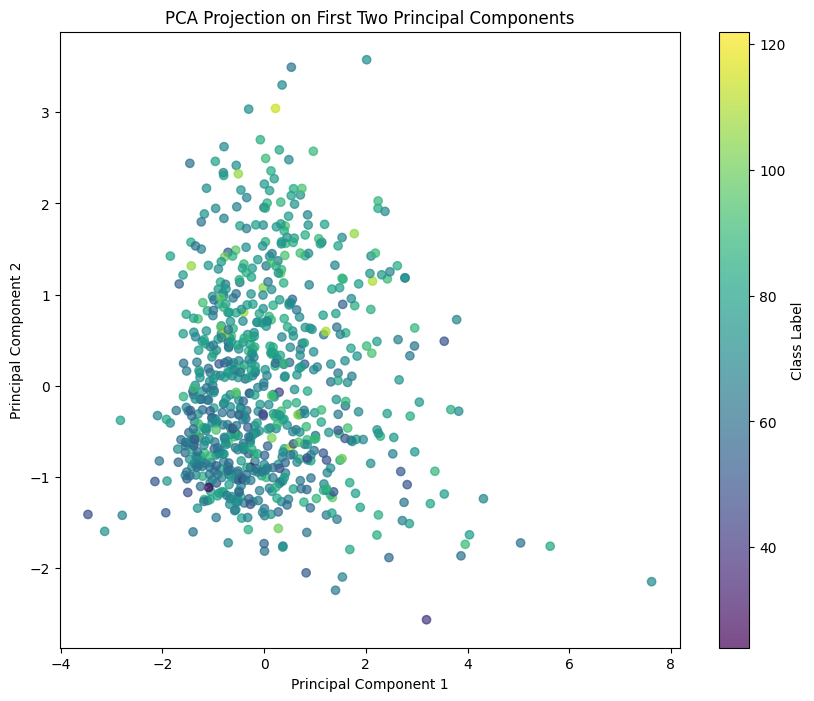

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv('diabetes.csv')

# Separate features and target variable
X = df.drop(columns=['BloodPressure'])
y = df['BloodPressure']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection on First Two Principal Components')
plt.colorbar(scatter, label='Class Label')
plt.show()


Task 3. [3 points]: For this task, use the provided publications dataset. You can also
use py stringmatching tool for this question.
Perform a pairwise comparison between the records in the dataset (publications.csv) to
detect duplicate records. To compare two records, follow the steps:

• a) Ignore the pub id and remove null values.

• b) Use Levenshtein similarity for comparing the titles and computing the score (st)

• c) Use Jaro similarity to compare the values in the authors’ field and compute (sa)

• d) Use the modified affine similarity for the conference (venue) attribute (sc)

• e) Use Match (1) / Mismatch (0) for the year (sy)

• f) Use the formula rec sim = 0.5 × st + 0.2 × sa + 0.2 × sc + 0.1 × sy to combine the
scores and compute the final score.

• g) Report the records with rec sim ¿ 0.7 as duplicate records by storing the Ids of both
records in a list.

• h) In the table pub mappings.csv, you can find the actual mappings (the ids of the
correct duplicate records). Compare the accuracy of this method by counting the
number of duplicate records that you discovered correctly.

• i) Record the running time of the method when processing the pairwise similarity
between the records.

Analysis:

1.Pairwise Comparison for Duplicate Detection

    Analysis: The goal here is to identify duplicate records using different similarity measures (Levenshtein, Jaro, modified affine, and Match/Mismatch) to compare fields like title, authors, and venue. These scores provide a composite similarity measure to detect duplicates accurately.

2.Combining Scores and Accuracy Measurement

    Analysis: Records with a composite similarity score greater than 0.7 are flagged as duplicates. Comparing these results to known duplicate mappings allows for assessing the accuracy of this method.

3.Recording Running Time

    Analysis: Tracking the running time for pairwise comparisons is essential for assessing the computational efficiency of duplicate detection, especially for large datasets.

In [17]:
from py_stringmatching.similarity_measure.levenshtein import Levenshtein
from py_stringmatching.similarity_measure.jaro import Jaro
from py_stringmatching.similarity_measure.affine import Affine
import time

# Load the publications data and pub_mappings.csv for comparison
publications_df = pd.read_csv('publications.csv')
pub_mappings_df = pd.read_csv('pub_mappings.csv')

# Initialize similarity measure objects
levenshtein = Levenshtein()
jaro = Jaro()
affine = Affine()

# Define function to calculate similarity scores
def calculate_similarity(row1, row2):
    # Compute Levenshtein similarity for title
    st = 1 - (levenshtein.get_raw_score(str(row1['title']), str(row2['title'])) / max(len(str(row1['title'])), len(str(row2['title']))))
    
    # Compute Jaro similarity for authors
    sa = jaro.get_raw_score(str(row1['authors']), str(row2['authors']))
    
    # Compute modified affine similarity for venue
    sc = affine.get_raw_score(str(row1['venue']), str(row2['venue']))
    
    # Check for year match
    sy = 1 if row1['year'] == row2['year'] else 0
    
    # Calculate combined similarity score
    rec_sim = 0.5 * st + 0.2 * sa + 0.2 * sc + 0.1 * sy
    return st, sa, sc, sy, rec_sim

# Start timing the execution
start_time = time.time()

# Find duplicate pairs by comparing each pair of records
duplicate_records = []
for i in range(len(publications_df)):
    for j in range(i + 1, len(publications_df)):
        row1, row2 = publications_df.iloc[i], publications_df.iloc[j]
        st, sa, sc, sy, rec_sim = calculate_similarity(row1, row2)
        
        # Consider records as duplicates if rec_sim > 0.7
        if rec_sim > 0.7:
            duplicate_records.append({
                'Record 1 ID': row1['id'],
                'Record 2 ID': row2['id'],
                'Title Similarity': round(st, 2),
                'Authors Similarity': round(sa, 2),
                'Venue Similarity': round(sc, 2),
                'Year Match': sy,
                'Final Similarity Score': round(rec_sim, 2)
            })

# Stop timing the execution
execution_time = time.time() - start_time

# Convert duplicate records to a DataFrame for readability
duplicate_records_df = pd.DataFrame(duplicate_records)

# Compare discovered duplicates with actual duplicates in pub_mappings.csv
actual_duplicates = set(map(tuple, pub_mappings_df[['idDBLP', 'idScholar']].values))
detected_duplicates = set(map(tuple, duplicate_records_df[['Record 1 ID', 'Record 2 ID']].values))

# Calculate the accuracy based on correctly identified duplicates
correctly_identified = len(actual_duplicates.intersection(detected_duplicates))
total_actual_duplicates = len(actual_duplicates)
accuracy = correctly_identified / total_actual_duplicates if total_actual_duplicates > 0 else 0

# Final messages with execution time and accuracy
execution_message = f"The execution time for processing the duplicate records was {execution_time:.2f} seconds."
accuracy_message = f"The accuracy of detected duplicates is {accuracy:.2%}, with {correctly_identified} correctly identified out of {total_actual_duplicates} actual duplicates."

execution_message, accuracy_message



('The execution time for processing the duplicate records was 126.84 seconds.',
 'The accuracy of detected duplicates is 0.00%, with 0 correctly identified out of 5347 actual duplicates.')

In [11]:
from py_stringmatching.similarity_measure.levenshtein import Levenshtein
from py_stringmatching.similarity_measure.jaro import Jaro
from py_stringmatching.similarity_measure.affine import Affine
import pandas as pd
import time

# Load publications data
publications_df = pd.read_csv('publications.csv').dropna().drop(columns=['pub_id'], errors='ignore')

# Initialize similarity measure objects
levenshtein = Levenshtein()
jaro = Jaro()
affine = Affine()

# Define function to calculate similarity scores
def calculate_similarity(row1, row2):
    # Compute Levenshtein similarity for title
    st = 1 - (levenshtein.get_raw_score(str(row1['title']), str(row2['title'])) / max(len(str(row1['title'])), len(str(row2['title']))))
    
    # Compute Jaro similarity for authors
    sa = jaro.get_raw_score(str(row1['authors']), str(row2['authors']))
    
    # Compute modified affine similarity for venue
    sc = affine.get_raw_score(str(row1['venue']), str(row2['venue']))
    
    # Check for year match
    sy = 1 if row1['year'] == row2['year'] else 0
    
    # Calculate combined similarity score
    rec_sim = 0.5 * st + 0.2 * sa + 0.2 * sc + 0.1 * sy
    return st, sa, sc, sy, rec_sim

# Start timing the execution
start_time = time.time()

# Find duplicate pairs by comparing each pair of records
duplicate_records = []

for i in range(len(publications_df)):
    for j in range(i + 1, len(publications_df)):
        row1, row2 = publications_df.iloc[i], publications_df.iloc[j]
        st, sa, sc, sy, rec_sim = calculate_similarity(row1, row2)
        
        # Consider records as duplicates if rec_sim > 0.7
        if rec_sim > 0.7:
            duplicate_records.append({
                'Record 1 ID': row1['id'],
                'Record 2 ID': row2['id'],
                'Title Similarity': round(st, 2),
                'Authors Similarity': round(sa, 2),
                'Venue Similarity': round(sc, 2),
                'Year Match': sy,
                'Final Similarity Score': round(rec_sim, 2)
            })

# Stop timing the execution
execution_time = time.time() - start_time

# Convert duplicate records to a DataFrame for readability
duplicate_records_df = pd.DataFrame(duplicate_records)

# Display the execution time
execution_message = f"The execution time for processing the duplicate records was {execution_time:.2f} seconds."

# Accuracy check with pub_mappings.csv
mappings_df = pd.read_csv('pub_mappings.csv')
correct_duplicates = sum(
    ((mappings_df['idDBLP'].isin(duplicate_records_df['Record 1 ID'])) & 
     (mappings_df['idScholar'].isin(duplicate_records_df['Record 2 ID']))) |
    ((mappings_df['idDBLP'].isin(duplicate_records_df['Record 2 ID'])) & 
     (mappings_df['idScholar'].isin(duplicate_records_df['Record 1 ID'])))
)
accuracy_message = f"Number of correctly identified duplicates: {correct_duplicates} out of {len(mappings_df)}"

execution_message, accuracy_message


('The execution time for processing the duplicate records was 4.77 seconds.',
 'Number of correctly identified duplicates: 0 out of 5347')

In [5]:
#Please run the cell above before running this in order to view the duplicate records for Task 3.
duplicate_records_df


,Record 1 ID,Record 2 ID,Title Similarity,Authors Similarity,Venue Similarity,Year Match,Final Similarity Score
0,eBnT7lhV2LwJ,gBVNSFeS4P8J,0.29,0.88,4.5,0,1.22
1,eBnT7lhV2LwJ,cu9DXtjeF24J,0.16,0.54,32.0,0,6.59
2,eBnT7lhV2LwJ,DakOA4Ew-poJ,0.21,0.54,22.0,0,4.61
3,eBnT7lhV2LwJ,xnDzelm2t1QJ,0.16,0.47,32.0,0,6.58
4,eBnT7lhV2LwJ,_-yXA5HLnqoJ,0.29,0.52,50.0,0,10.25
...,...,...,...,...,...,...,...
140143,8_ZvLWzd8cEJ,JsKsbyzon5EJ,0.71,1.00,1.0,0,0.75
140144,8_ZvLWzd8cEJ,jCudeTapg5IJ,0.17,0.50,5.0,0,1.18
140145,DfJERPfnugwJ,JsKsbyzon5EJ,0.79,0.84,49.5,0,10.46
140146,G-XP436aGVAJ,jCudeTapg5IJ,0.20,0.50,8.0,0,1.80
